## Inspecting selected lipids found in only a handful of pixels - exploratory analysis  

Visualize example quantifications and compare with single peak intensities:

<IPython.core.display.Javascript object>


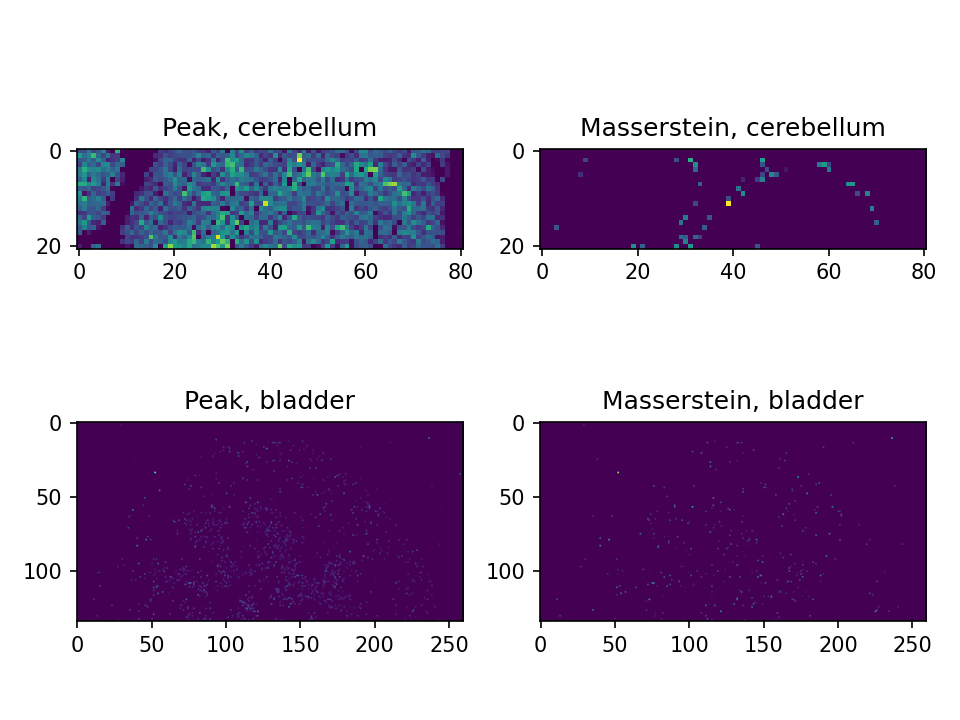

In [15]:
lipid_id = 4

plt.figure()
plt.subplot(221)
plt.title('Peak, cerebellum')
plt.imshow(single_peak_images['cerebellum'][...,lipid_id])
plt.subplot(222)
plt.title('Masserstein, cerebellum')
plt.imshow(regression_images['cerebellum'][...,lipid_id])
plt.subplot(223)
plt.title('Peak, bladder')
plt.imshow(single_peak_images['bladder'][...,lipid_id])
plt.subplot(224)
plt.title('Masserstein, bladder')
plt.imshow(regression_images['bladder'][...,lipid_id])
plt.tight_layout()
plt.show()

Plot the average spectra in the lipid concentration region to verify that the lipid is indeed there:

In [16]:
test_spectrum = lipid_spectra['cerebellum'][lipid_id]
local_mass_axis = np.linspace(test_spectrum.confs[0][0]-10, test_spectrum.confs[0][0]+20, 10001)

In [17]:
cer_mask = single_peak_images['cerebellum'][...,lipid_id] > 0
mask0_spectrum, mask1_spectrum = segment_average_spectra(cerebellum_profile_image, cer_mask, local_mass_axis)          


In [18]:
spectrum_scaling_coef = np.interp(test_spectrum.confs[0][0], 
                                  local_mass_axis,
                                  mask1_spectrum)/(test_spectrum.confs[0][1]*sum(mask1_spectrum))
test_spectrum = test_spectrum*spectrum_scaling_coef

<IPython.core.display.Javascript object>


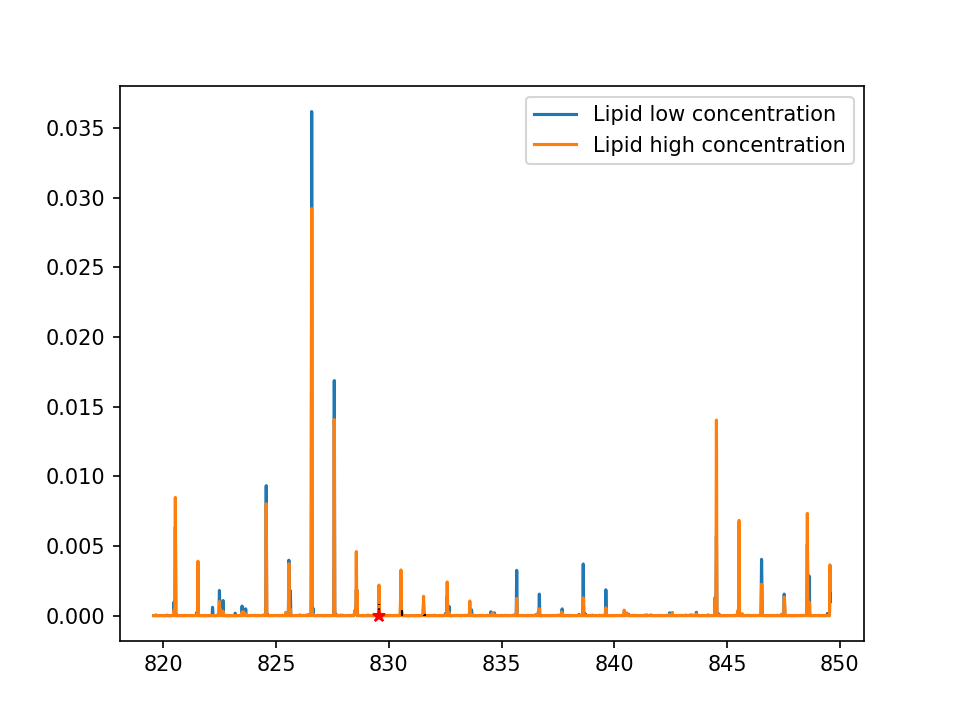

In [19]:
plt.figure()
plt.plot(local_mass_axis, mask0_spectrum/sum(mask0_spectrum))
plt.plot(local_mass_axis, mask1_spectrum/sum(mask1_spectrum))
test_spectrum.plot(ls='--', lw=1, color='k')
plt.plot(test_spectrum.confs[0][0], [0], 'r*')
plt.legend(['Lipid low concentration', 'Lipid high concentration'])

The selected lipid is indeed present in just a few pixels of the cerebellum.

## Lipid subclasses

In [1]:
formula_to_class = {}
formula_to_subclass = {}
formula_to_subclass_short = {}
subclass_labeling = {}
with open('selected_lipids_28032022.tsv') as h:
    for l in h:
        l = l.strip().split('\t')
        formula = l[3]
        lipid_class = l[1]
        subclass = l[2]
        subclass_symbol = subclass[(subclass.index('[')+1):subclass.index(']')]
        subclass_labeling[subclass_symbol] = subclass
        try:
            formula_to_subclass[formula].add(subclass)
            formula_to_subclass_short[formula].add(subclass_symbol)
        except KeyError:
            formula_to_subclass[formula] = {subclass}
            formula_to_subclass_short[formula] = {subclass_symbol}
        try:
            formula_to_class[formula].add(subclass)
        except KeyError:
            formula_to_class[formula] = {subclass}
    for f in formula_to_subclass_short:
        formula_to_subclass_short[f] = '/'.join(sorted(formula_to_subclass_short[f]))

In [23]:
# lipid_total_signals = {n: np.sum(masserstein_estimation[n], axis=0) for n in image_names}

In [30]:
# annotated_subclasses = {n: [formula_to_subclass[f] for f in lipid_formulas[n]] for n in image_names}

In [54]:
# subclass_total_signals = {n: {} for n in image_names}
# for n in image_names:
#     for i, f in enumerate(lipid_formulas[n]):
#         sbc = formula_to_subclass_short[f]
#         try:
#             subclass_total_signals[n][sbc] += lipid_total_signals[n][i]
#         except KeyError:
#             subclass_total_signals[n][sbc] = lipid_total_signals[n][i]
#     summed_signals = sum(subclass_total_signals[n].values())
#     for sbc in subclass_total_signals[n]:
#         subclass_total_signals[n][sbc] /= summed_signals
#     subclass_total_signals[n] = sorted(subclass_total_signals[n].items(), key=lambda x: x[1], reverse=True)

In [66]:
# subclass_total_signals

{'cerebellum': [('GP01/GP02', 0.5757498532214648),
  ('GP10', 0.26934393307787896),
  ('SP03', 0.08681343818677469),
  ('GP03', 0.03660296926332466),
  ('GP01', 0.01051171891169834),
  ('SP05', 0.009002413380646048),
  ('GP04', 0.007878280792980386),
  ('GP20', 0.0009954729865622829),
  ('GP01/GP02/GP20', 0.0009837252979429598),
  ('GP03/GP20', 0.0009097259673362564),
  ('GP02', 0.0008162262253912177),
  ('SP02', 0.00039224268799928976)],
 'bladder': [('GP01/GP02', 0.6709836160837115),
  ('SP03', 0.25937001879569627),
  ('GP10', 0.04318056400918281),
  ('GP04', 0.012991407495416387),
  ('SP05', 0.005571353810821087),
  ('GP01/GP02/GP20', 0.0035834456407945717),
  ('GP01', 0.0023658928977174044),
  ('GP03', 0.0019537012666599953)]}

In [65]:
# subclass_labeling

{'GP00': 'Other Glycerophospholipids [GP00]',
 'GP01': 'Glycerophosphocholines [GP01]',
 'GP02': 'Glycerophosphoethanolamines [GP02]',
 'GP03': 'Glycerophosphoserines [GP03]',
 'GP04': 'Glycerophosphoglycerols [GP04]',
 'GP05': 'Glycerophosphoglycerophosphates [GP05]',
 'GP06': 'Glycerophosphoinositols [GP06]',
 'GP07': 'Glycerophosphoinositol monophosphates [GP07]',
 'GP08': 'Glycerophosphoinositol bisphosphates [GP08]',
 'GP09': 'Glycerophosphoinositol trisphosphates [GP09]',
 'GP10': 'Glycerophosphates [GP10]',
 'GP11': 'Glyceropyrophosphates [GP11]',
 'GP12': 'Glycerophosphoglycerophosphoglycerols [GP12]',
 'GP13': 'CDP-Glycerols [GP13]',
 'GP14': 'Glycosylglycerophospholipids [GP14]',
 'GP15': 'Glycerophosphoinositolglycans [GP15]',
 'GP16': 'Glycerophosphonocholines [GP16]',
 'GP17': 'Glycerophosphonoethanolamines [GP17]',
 'GP18': 'Di-glycerol tetraether phospholipids (caldarchaeols) [GP18]',
 'GP19': 'Glycerol-nonitol tetraether phospholipids [GP19]',
 'GP20': 'Oxidized glycero